<h1><center>Performance Assessment Task 1 - Linear Regression Modeling</center></h1>
<h3><center> by Bader Ale <center><h3>

# ▶ Research Question
Our research questions is as follows: __What caused the highest amount of total charges to the patient during their stay__.

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from IPython.core.interactiveshell import InteractiveShell # Importing so we can run multiple lines in one cell
InteractiveShell.ast_node_interactivity = "all" # Code so multiple lines in one cell can be ran simultaenously 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing origiginal dataset
df = pd.read_csv('F:\GitHub Repos\WGU_MSDA\D208_Predictive Modeling\medical_clean.csv')

# ▶ Data Cleaning  

Target variable for task 1:  __*TotalCharge*__  
Explanatory variable(s) for task 1: __*Age*__  , __*Income*__  , __*Gender*__, __*Initial_Admin*__  , __*Complication_Risk*__  , __*Services*__ , __*Initial_Days*__  

In [3]:
# Showing first 5 records
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
# Creating new dataframe with only those variables of interest
df_vars = df[['Age', 'Income', 'Gender', 'Doc_visits', 'Initial_admin', 'Complication_risk', 'Services', 'Initial_days', 'TotalCharge']]

## Detection and Treatment of Nulls

In [5]:
# Getting number of rows and columns
df_vars.shape

(10000, 9)

In [6]:
# Checking for null values
df_vars.isnull().sum()

Age                  0
Income               0
Gender               0
Doc_visits           0
Initial_admin        0
Complication_risk    0
Services             0
Initial_days         0
TotalCharge          0
dtype: int64

Here we can see there are no Nulls in our new dataframe

## Detection and Treatment of Duplicated Values

In [7]:
# Checking for duplicates
df_vars.duplicated().value_counts()

False    10000
dtype: int64

The output shows 10000 records as being False, therefore we do not have any duplicated values.

## Detection and Treatment of Outliers

In [8]:
# Checking datatypes for all variables in new dataframe
df_vars.dtypes

Age                    int64
Income               float64
Gender                object
Doc_visits             int64
Initial_admin         object
Complication_risk     object
Services              object
Initial_days         float64
TotalCharge          float64
dtype: object

We will first focus on the continuous variables and analyze, if any, the outliers. We will normalize our data for ease of visual interpretation

In [9]:
# Performing normalization on the continuous variables for the new dataframe
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_vars[['Age', 'Income', 'Doc_visits', 'Initial_days', 'TotalCharge']]) # Selecting only those numerical variables in our new dataframe
scaled = scaler.fit_transform(df_vars[['Age', 'Income', 'Doc_visits', 'Initial_days', 'TotalCharge']])
scaled_df_vars = pd.DataFrame(scaled, columns = ('Age', 'Income', 'Doc_visits', 'Initial_days', 'TotalCharge')) # Creating a new dataframe for visualization

MinMaxScaler()

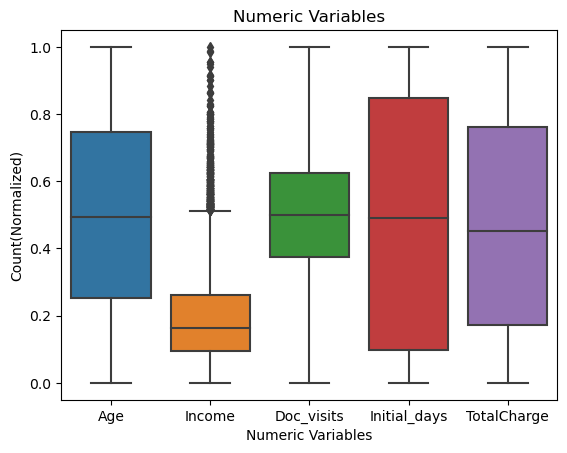

In [10]:
# Plotting the normalized, numerical data 
sns.boxplot(scaled_df_vars)
plt.title('Numeric Variables')
plt.ylabel('Count(Normalized)')
plt.xlabel('Numeric Variables');

We can see Income is the only numeric variable with outliers. We will use z-scores greater than 3 to eliminate those outliers

In [11]:
# Importing SciPy library
import scipy.stats as stats

In [12]:
# Creating a new column for the Income z-scores
df_vars['Income_z_Scores'] = stats.zscore(df_vars['Income'])

In [13]:
# Creating a new dataframe with extracted Income outliers
df_vars_cleaned = df_vars[(df_vars['Income_z_Scores'] > -3) & (df_vars['Income_z_Scores'] < 3)]

In [14]:
df_vars_cleaned.head()

,Age,Income,Gender,Doc_visits,Initial_admin,Complication_risk,Services,Initial_days,TotalCharge,Income_z_Scores
0,53,86575.93,Male,6,Emergency Admission,Medium,Blood Work,10.585770,3726.702860,1.615914
1,51,46805.99,Female,4,Emergency Admission,High,Intravenous,15.129562,4193.190458,0.221443
2,53,14370.14,Female,4,Elective Admission,Medium,Blood Work,4.772177,2434.234222,-0.915870
3,78,39741.49,Male,4,Elective Admission,Medium,Blood Work,1.714879,2127.830423,-0.026263
4,22,1209.56,Female,5,Elective Admission,Low,CT Scan,1.254807,2113.073274,-1.377325


In [15]:
# Dropping the Income_z_Scores columns since
# we won't need it anymore
df_vars_cleaned.drop(['Income_z_Scores'], axis=1, inplace=True)

In [16]:
# Checking for Income_z_Score column drop
df_vars_cleaned.head()

,Age,Income,Gender,Doc_visits,Initial_admin,Complication_risk,Services,Initial_days,TotalCharge
0,53,86575.93,Male,6,Emergency Admission,Medium,Blood Work,10.585770,3726.702860
1,51,46805.99,Female,4,Emergency Admission,High,Intravenous,15.129562,4193.190458
2,53,14370.14,Female,4,Elective Admission,Medium,Blood Work,4.772177,2434.234222
3,78,39741.49,Male,4,Elective Admission,Medium,Blood Work,1.714879,2127.830423
4,22,1209.56,Female,5,Elective Admission,Low,CT Scan,1.254807,2113.073274


# ▶ Exploratory Data Analysis  

In [17]:
# Summary Statistics
df_vars_cleaned.describe()

,Age,Income,Doc_visits,Initial_days,TotalCharge
count,9857.000000,9857.000000,9857.000000,9857.000000,9857.000000
mean,53.537283,38908.927266,5.010855,34.483667,5314.860400
std,20.633456,25392.839109,1.043972,26.305266,2180.227407
min,18.000000,154.080000,1.000000,1.001981,1938.312067
25%,36.000000,19370.980000,4.000000,7.912315,3181.679327
50%,53.000000,33292.200000,5.000000,36.270750,5252.764000
75%,71.000000,53275.410000,6.000000,61.170620,7460.305000
max,89.000000,125977.370000,9.000000,71.981490,9180.728000


In [18]:
df_vars_cleaned.dtypes

Age                    int64
Income               float64
Gender                object
Doc_visits             int64
Initial_admin         object
Complication_risk     object
Services              object
Initial_days         float64
TotalCharge          float64
dtype: object

## Univariate Analysis  
### Numeric Variables

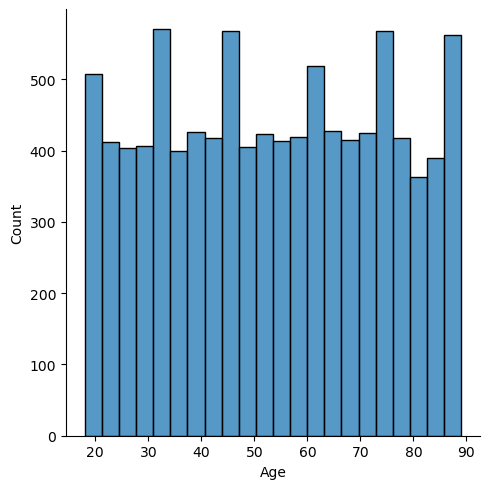

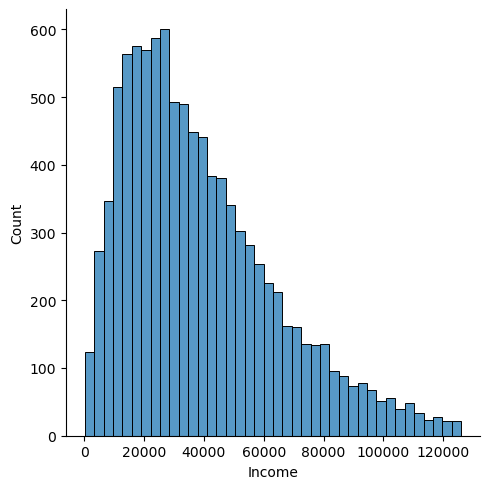

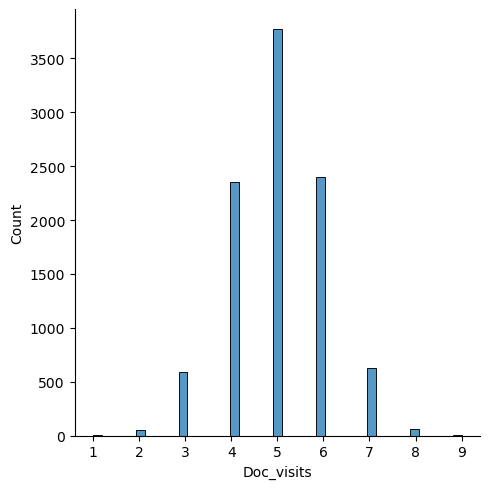

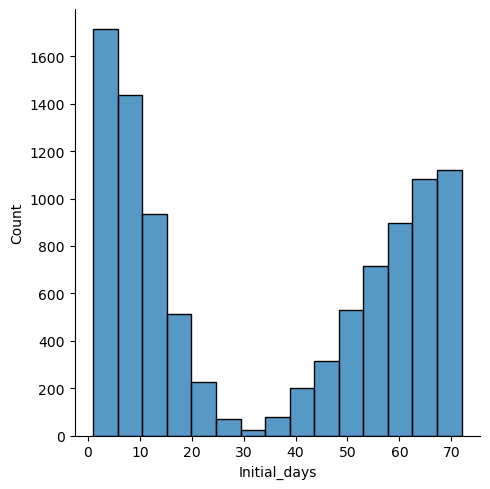

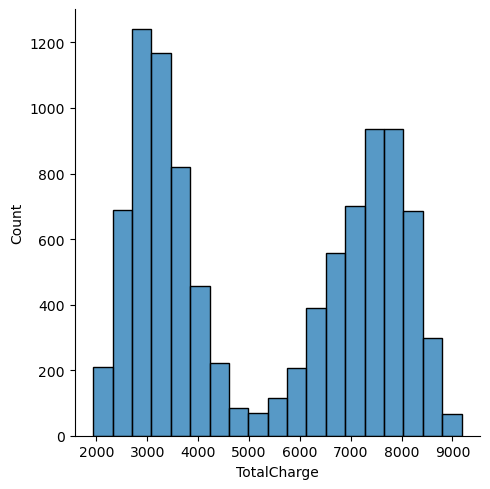

In [19]:
# Univariate analysis visualizations for numerical variables
sns.displot(df_vars_cleaned['Age']);
sns.displot(df_vars_cleaned['Income']);
sns.displot(df_vars_cleaned['Doc_visits']);
sns.displot(df_vars_cleaned['Initial_days']);
sns.displot(df_vars_cleaned['TotalCharge']);

### Categorical Variables

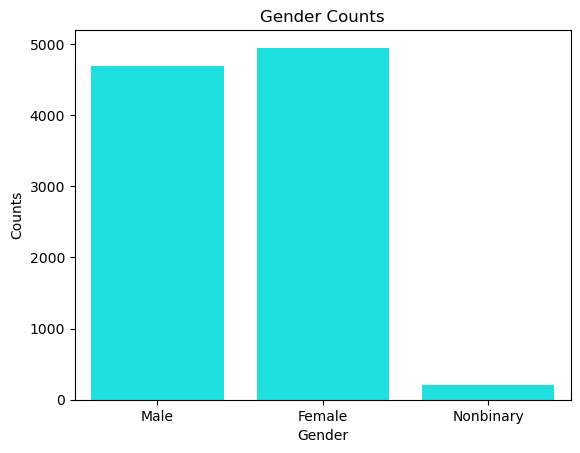

In [20]:
# Gender Countplot
sns.countplot(df_vars_cleaned, x='Gender',color='aqua')
plt.title('Gender Counts')
plt.ylabel('Counts');

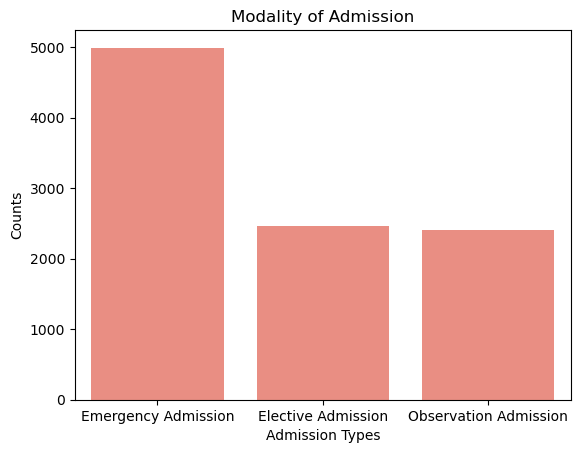

In [21]:
# Initial_admin Countplot
sns.countplot(df_vars_cleaned, x='Initial_admin',color='salmon')
plt.title('Modality of Admission')
plt.xlabel('Admission Types')
plt.ylabel('Counts');

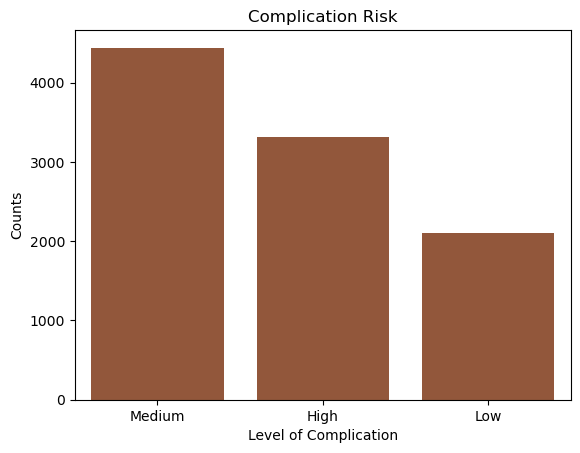

In [22]:
# Complication Risk Countplot
sns.countplot(df_vars_cleaned, x='Complication_risk',color='sienna')
plt.title('Complication Risk')
plt.xlabel('Level of Complication')
plt.ylabel('Counts');

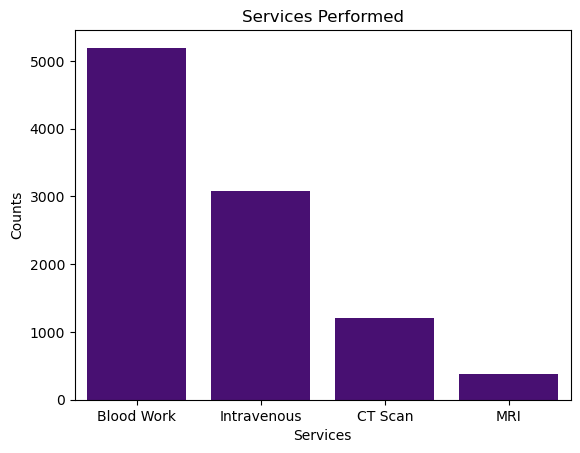

In [23]:
# Services Countplot
sns.countplot(df_vars_cleaned, x='Services',color='indigo')
plt.title('Services Performed')
plt.xlabel('Services')
plt.ylabel('Counts');

## Bivariate Analysis  
### Numeric Variables

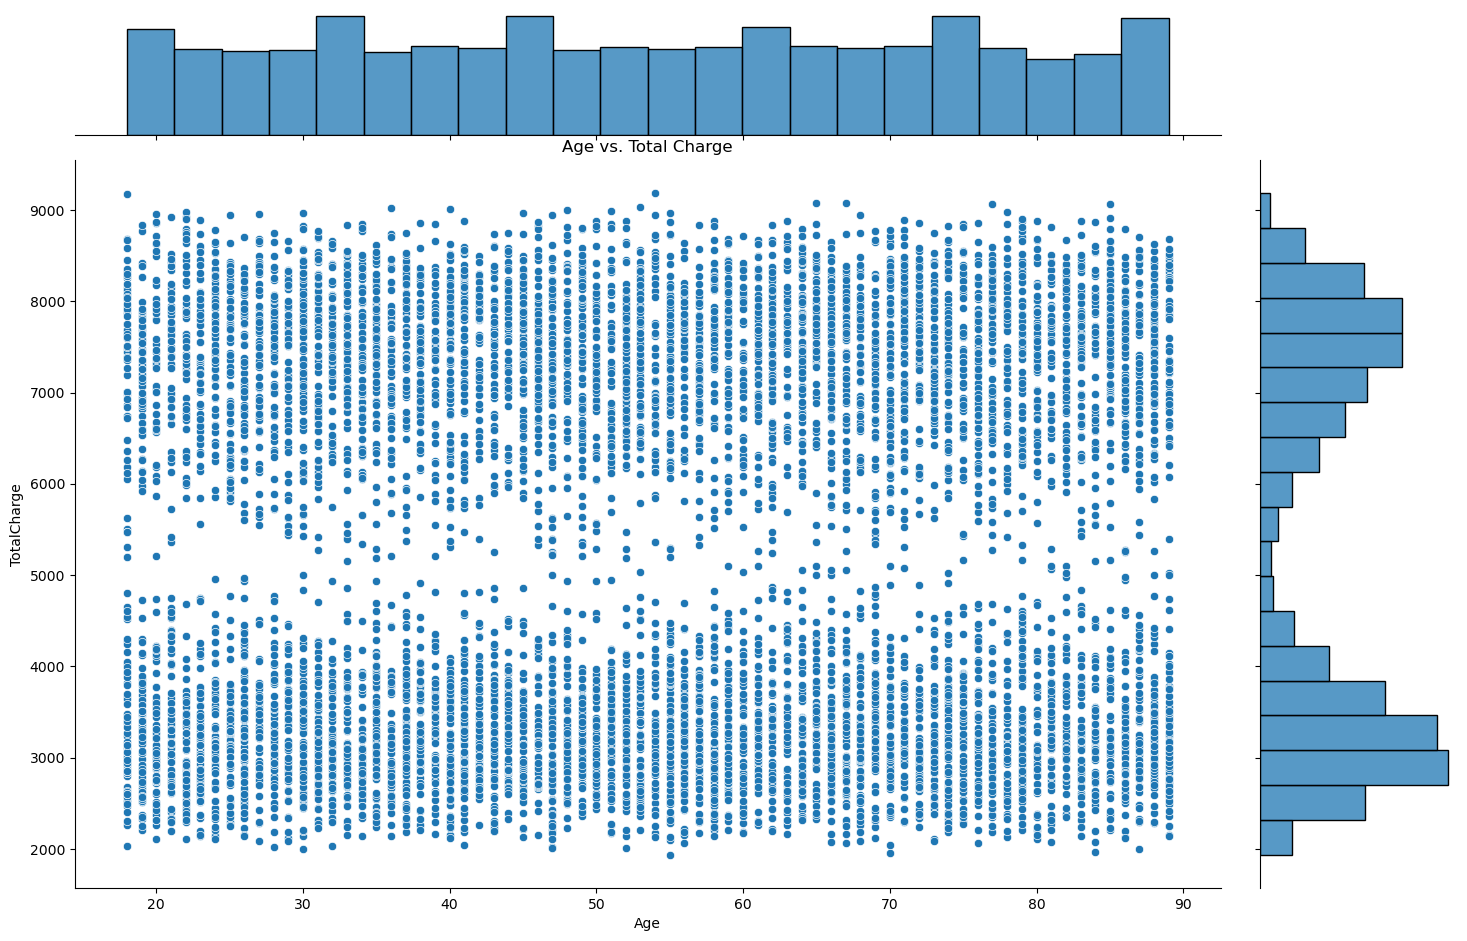

In [24]:
# Bivariate analysis visualizations for Age vs Total_Charge
sns.jointplot(data=df_vars_cleaned, x='Age', y='TotalCharge')
plt.title('Age vs. Total Charge')
fig = plt.gcf()
fig.set_size_inches(16, 10);

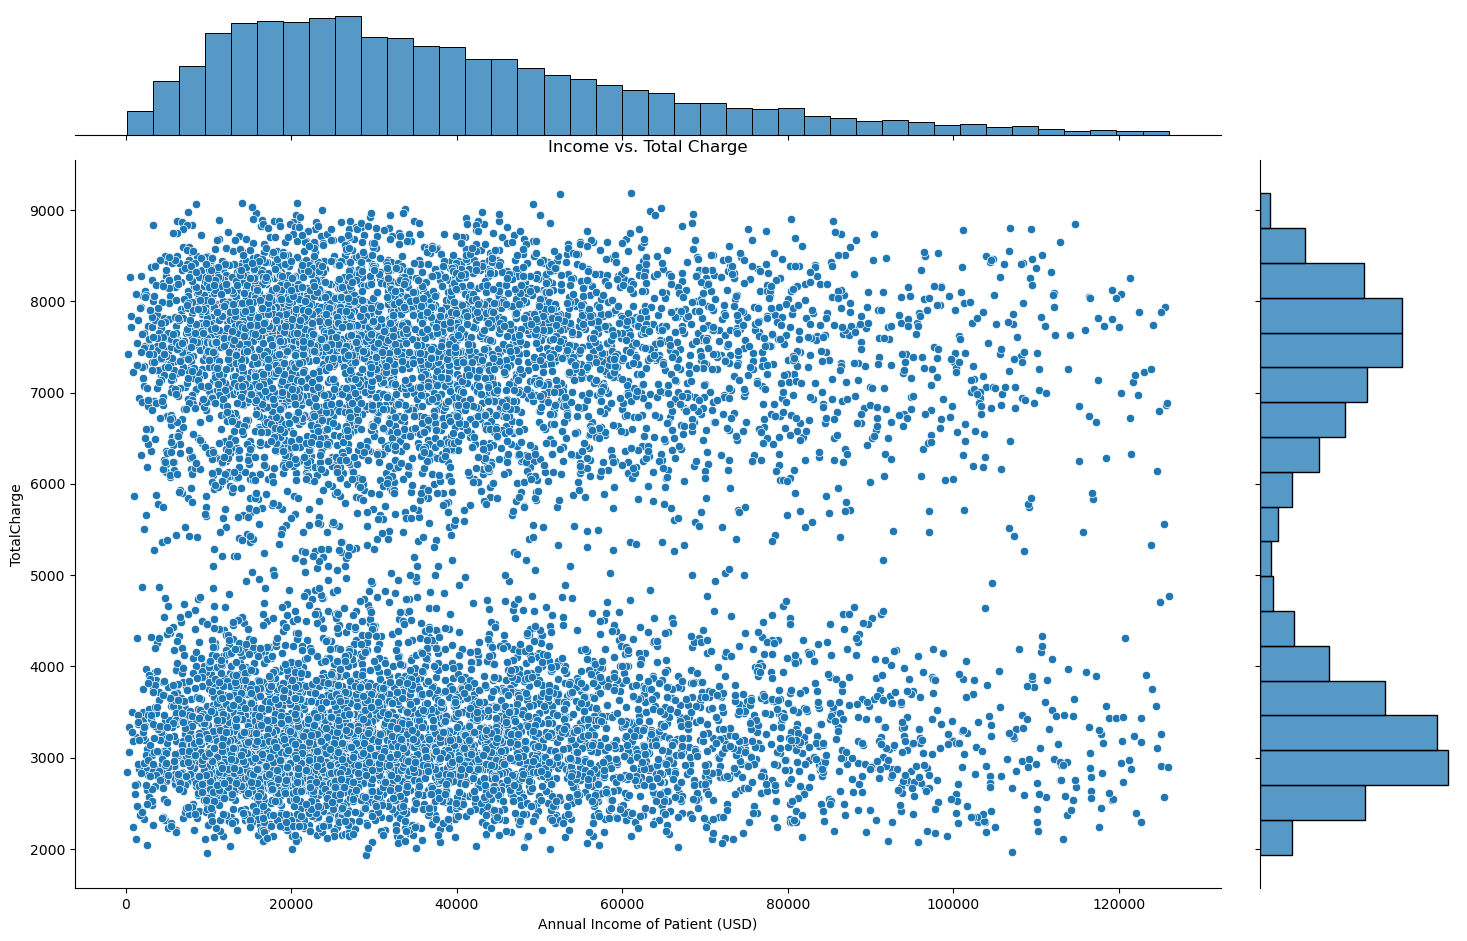

In [25]:
# Income vs Total Charge
sns.jointplot(data=df_vars_cleaned, x='Income', y='TotalCharge')
plt.title('Income vs. Total Charge')
plt.xlabel('Annual Income of Patient (USD)')
fig = plt.gcf()
fig.set_size_inches(16, 10);

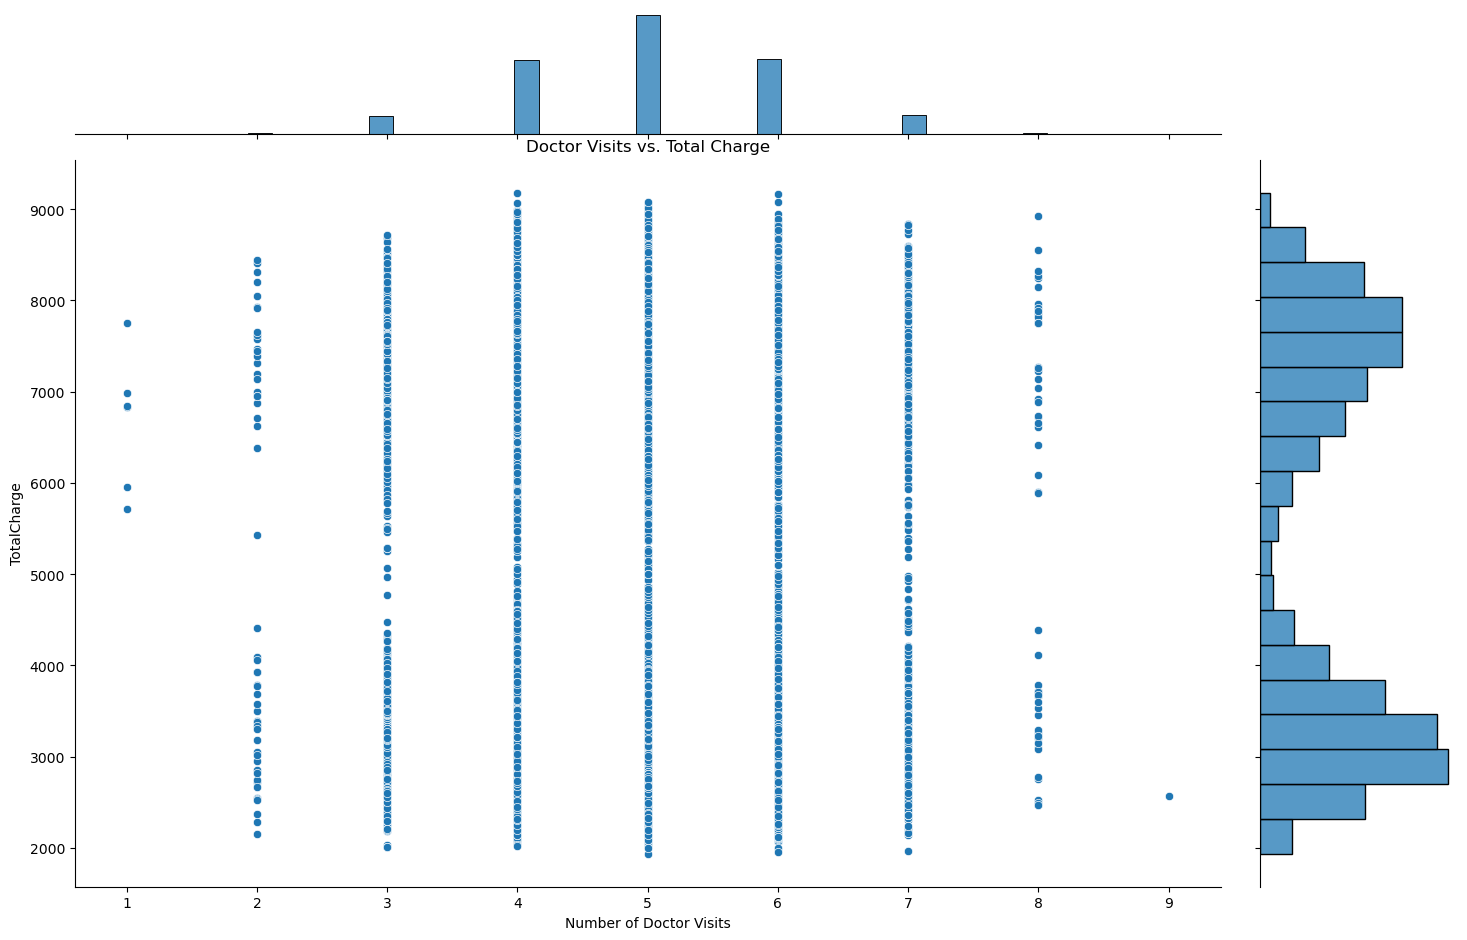

In [26]:
# Doc-Visits vs Total Charge
sns.jointplot(data=df_vars_cleaned, x='Doc_visits', y='TotalCharge')
plt.title('Doctor Visits vs. Total Charge')
plt.xlabel('Number of Doctor Visits')
fig = plt.gcf()
fig.set_size_inches(16, 10);

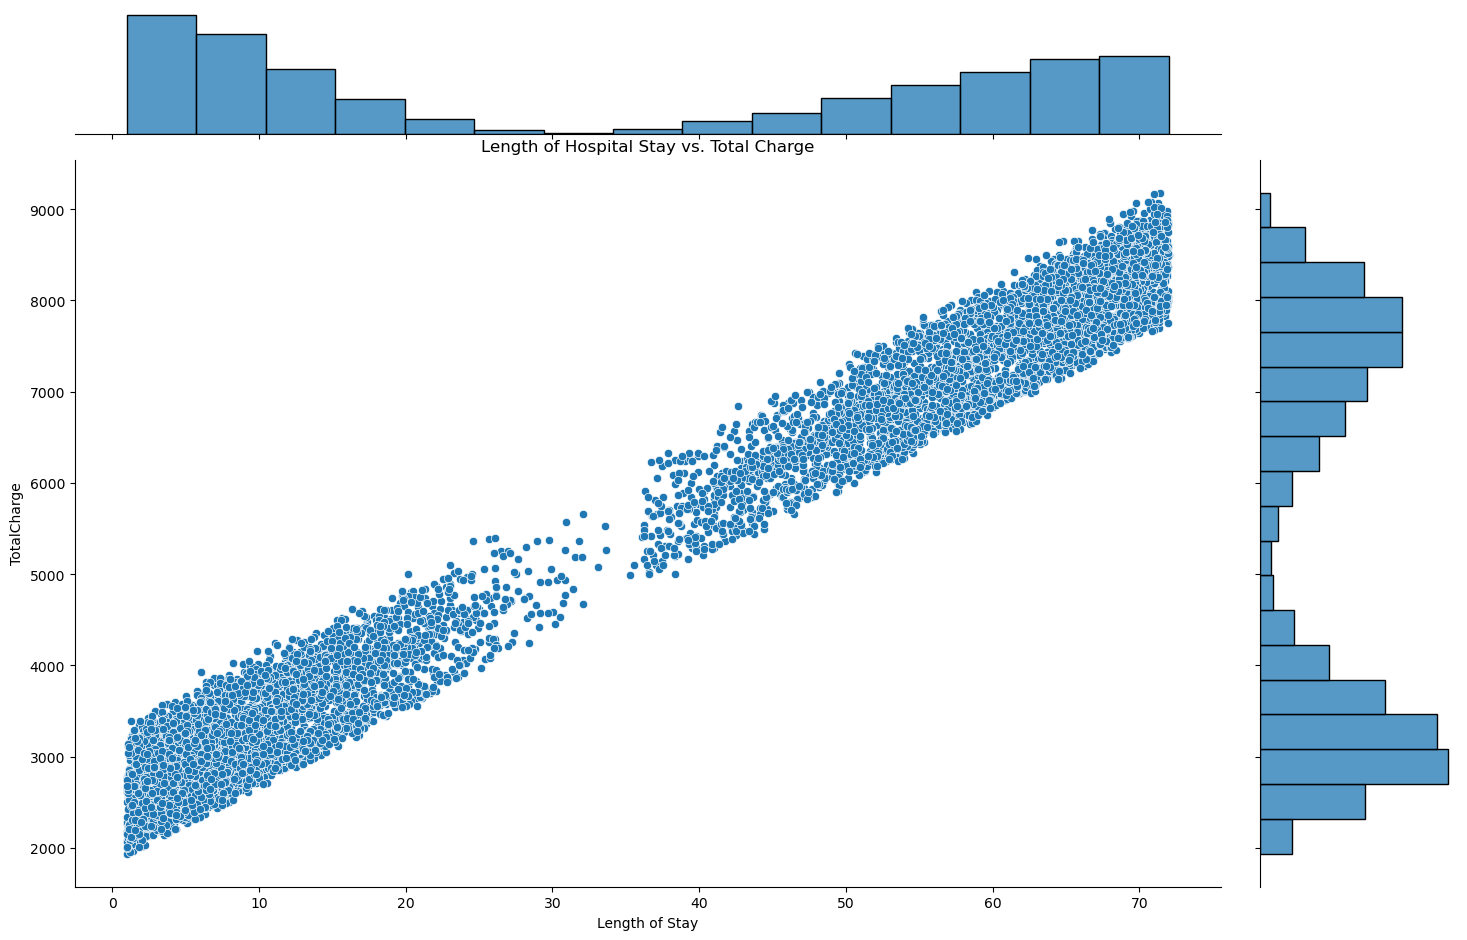

In [27]:
# Initial Days vs Total Charge
sns.jointplot(data=df_vars_cleaned, x='Initial_days', y='TotalCharge')
plt.title('Length of Hospital Stay vs. Total Charge')
plt.xlabel('Length of Stay')
fig = plt.gcf()
fig.set_size_inches(16, 10);

### Categorical Variables

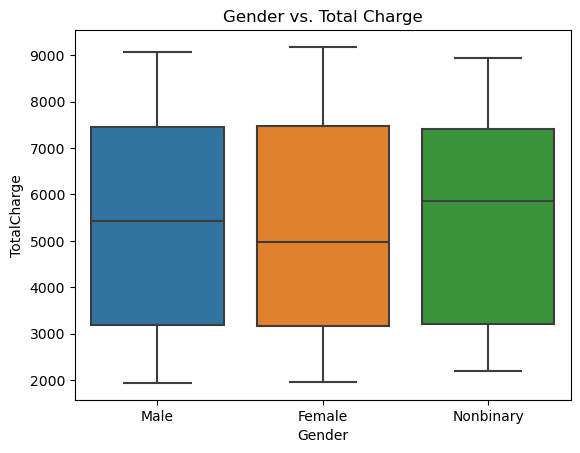

In [28]:
#  Gender vs Total Charge
sns.boxplot(x='Gender', y='TotalCharge', data=df_vars_cleaned)
plt.title('Gender vs. Total Charge');

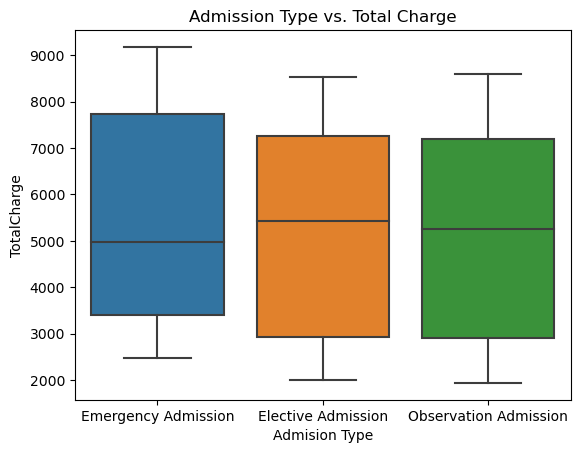

In [29]:
#  Initial Admin vs Total Charge
sns.boxplot(x='Initial_admin', y='TotalCharge', data=df_vars_cleaned)
plt.title('Admission Type vs. Total Charge')
plt.xlabel('Admision Type');

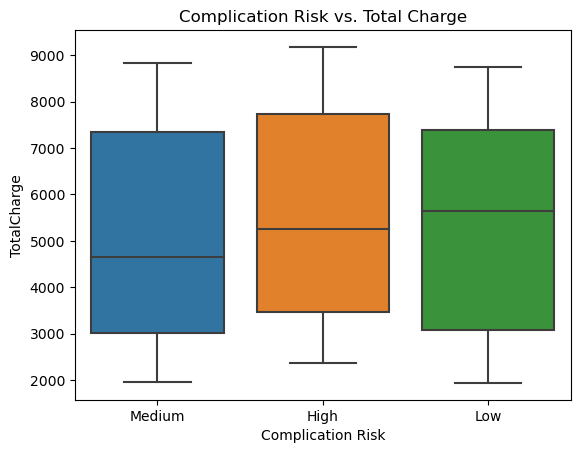

In [30]:
#  Complication_risk vs Total Charge
sns.boxplot(x='Complication_risk', y='TotalCharge', data=df_vars_cleaned)
plt.title('Complication Risk vs. Total Charge')
plt.xlabel('Complication Risk');

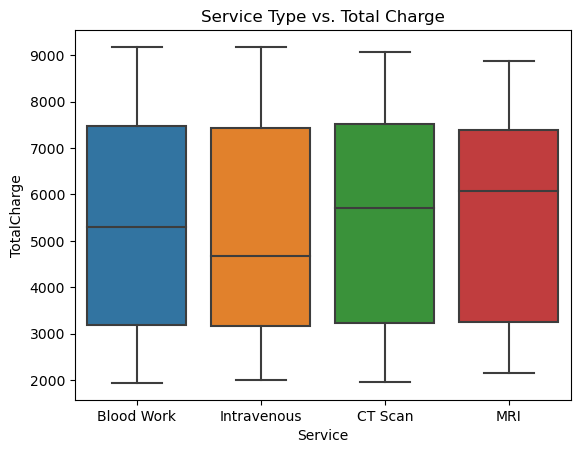

In [31]:
#  Services vs Total Charge
sns.boxplot(x='Services', y='TotalCharge', data=df_vars_cleaned)
plt.title('Service Type vs. Total Charge')
plt.xlabel('Service');

# ▶ Data Wrangling  

In [32]:
# Printing datatypes 
df_vars_cleaned.dtypes

Age                    int64
Income               float64
Gender                object
Doc_visits             int64
Initial_admin         object
Complication_risk     object
Services              object
Initial_days         float64
TotalCharge          float64
dtype: object

## Re-expression of Categorical Variables  
Our  categorical explanatory variables include both nominal and ordinal variables.There are listed below:  

* Ordinal - __*Complication_risk*__
* Nominal - __*Gender*__, __*Initial_admin*__, and __*Services*__  

### Ordinal Re-Expression

In [33]:
# Checking unique levels in variable Complication risk
df_vars_cleaned['Complication_risk'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

We can see that the ordinal variable _*Complication_risk*_ has 3 levels: Low, Medium and High and we will encode them as 0, 1, 2 respectively using the library scikit-learn's OrdinalEncoder class.  
We will first create a list of the risk levels (mentioned above) in ascending order.

In [34]:
# Importing sklean library
from sklearn.preprocessing import OrdinalEncoder

In [35]:
# Creating Encoder Object
oe = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
oe

OrdinalEncoder(categories=[['Low', 'Medium', 'High']])

In [36]:
# Fitting and transforming complication risk column 
df_vars_cleaned['Complication_risk'] = oe.fit_transform(df_vars_cleaned[['Complication_risk']])

In [37]:
# Checking if encoding was done 
df_vars_cleaned.head()

,Age,Income,Gender,Doc_visits,Initial_admin,Complication_risk,Services,Initial_days,TotalCharge
0,53,86575.93,Male,6,Emergency Admission,1.0,Blood Work,10.585770,3726.702860
1,51,46805.99,Female,4,Emergency Admission,2.0,Intravenous,15.129562,4193.190458
2,53,14370.14,Female,4,Elective Admission,1.0,Blood Work,4.772177,2434.234222
3,78,39741.49,Male,4,Elective Admission,1.0,Blood Work,1.714879,2127.830423
4,22,1209.56,Female,5,Elective Admission,0.0,CT Scan,1.254807,2113.073274


Here we can see the _**Complication_risk**_ column is now encoded.  
We will be moving to the nominal variables.

In [38]:
df_vars_cleaned[['Gender', 'Initial_admin', 'Services']].head(10)

,Gender,Initial_admin,Services
0,Male,Emergency Admission,Blood Work
1,Female,Emergency Admission,Intravenous
2,Female,Elective Admission,Blood Work
3,Male,Elective Admission,Blood Work
4,Female,Elective Admission,CT Scan
5,Male,Observation Admission,Blood Work
6,Male,Emergency Admission,Intravenous
7,Female,Observation Admission,Intravenous
8,Male,Emergency Admission,Intravenous
9,Female,Emergency Admission,Blood Work


### Nominal Encoding

We will be using Scikit-learn's Columnar Transformer / OneHotEncoder function to encode the remaining nominal variables.

In [39]:
# Importing Libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [40]:
# Creating transformer object specifying what columns to encode
transformer = make_column_transformer(
    (OneHotEncoder(), ['Gender', 'Initial_admin', 'Services']),
    remainder='passthrough'
)

In [46]:
# Fitting and transforming data
transformed = transformer.fit_transform(df_vars_cleaned)

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.05857697e+01, 3.72670286e+03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.00000000e+00, 1.51295622e+01, 4.19319046e+03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 4.77217721e+00, 2.43423422e+03],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.00000000e+00, 7.01541800e+01, 8.27648100e+03],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 6.33569000e+01, 7.64448300e+03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.08505900e+01, 7.88755300e+03]])

In [49]:
# Creating new dataframe with encoded variables and column names
df_vars_cleaned_encoded = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

In [50]:
# Output of new encoded dataframe
df_vars_cleaned_encoded.head(10)

,onehotencoder__Gender_Female,onehotencoder__Gender_Male,onehotencoder__Gender_Nonbinary,onehotencoder__Initial_admin_Elective Admission,onehotencoder__Initial_admin_Emergency Admission,onehotencoder__Initial_admin_Observation Admission,onehotencoder__Services_Blood Work,onehotencoder__Services_CT Scan,onehotencoder__Services_Intravenous,onehotencoder__Services_MRI,remainder__Age,remainder__Income,remainder__Doc_visits,remainder__Complication_risk,remainder__Initial_days,remainder__TotalCharge
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,53.0,86575.93,6.0,1.0,10.585770,3726.702860
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,51.0,46805.99,4.0,2.0,15.129562,4193.190458
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,53.0,14370.14,4.0,1.0,4.772177,2434.234222
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,78.0,39741.49,4.0,1.0,1.714879,2127.830423
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,22.0,1209.56,5.0,0.0,1.254807,2113.073274
5,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,76.0,81999.88,6.0,1.0,5.957250,2636.691180
6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,50.0,10456.05,6.0,0.0,9.058210,3694.627161
7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,40.0,38319.29,7.0,1.0,14.228019,3021.499039
8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,48.0,55586.48,6.0,0.0,6.180339,2968.402860
9,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,78.0,38965.22,7.0,2.0,1.632554,3147.855813


In [58]:
# Renaming Columns
df_vars_cleaned_encoded.rename(columns={'onehotencoder__Gender_Female':'Gender_Female',
                                        'onehotencoder__Gender_Male':'Gender_Male',
                                        'onehotencoder__Gender_Nonbinary':'Gender_NonBinary',
                                        'onehotencoder__Initial_admin_Elective Admission':'Elective_Admission',
                                        'onehotencoder__Initial_admin_Emergency Admission':'Emergency_Admission',
                                        'onehotencoder__Initial_admin_Observation Admission':'Observation_Admission',
                                        'onehotencoder__Services_Blood Work':'Service_BloodWork',
                                        'onehotencoder__Services_CT Scan': 'Service_CTScan',
                                        'onehotencoder__Services_Intravenous':'Service_IV',
                                        'onehotencoder__Services_MRI':'Service_MRI',
                                        'remainder__Age':'Age',
                                        'remainder__Income':'Income',
                                        'remainder__Doc_visits':'Doc_Visits',
                                        'remainder__Complication_risk':'Complication_Risk',
                                        'remainder__Initial_days':'Length_Of_Stay',
                                        'remainder__TotalCharge':'Total_Charge'}, inplace=True);

In [59]:
df_vars_cleaned_encoded.head(5)

,Gender_Female,Gender_Male,Gender_NonBinary,Elective_Admission,Emergency_Admission,Observation_Admission,Service_BloodWork,Service_CTScan,Service_IV,Service_MRI,Age,Income,Doc_Visits,Complication_Risk,Length_Of_Stay,Total_Charge
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,53.0,86575.93,6.0,1.0,10.585770,3726.702860
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,51.0,46805.99,4.0,2.0,15.129562,4193.190458
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,53.0,14370.14,4.0,1.0,4.772177,2434.234222
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,78.0,39741.49,4.0,1.0,1.714879,2127.830423
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,22.0,1209.56,5.0,0.0,1.254807,2113.073274


## Multicollinearity Detection  
The final phase of data preparation is to check for multicollinearity. We will use Variance Inflation Factor (VIF) to detect for these variables and deal with them accordingly.

In [62]:
# Importing libraries for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
vif_data = pd.DataFrame() # Creating an empty dataframe to house the feature and VIF factor
vif_data["feature"] = df_vars_cleaned_encoded.columns # Creating the features columns 
vif_data["VIF"] = [variance_inflation_factor(df_vars_cleaned_encoded.values, i) # Calculating the VIF column
                          for i in range(len(df_vars_cleaned_encoded.columns))]

In [66]:
vif_data

,feature,VIF
0,Gender_Female,inf
1,Gender_Male,inf
2,Gender_NonBinary,inf
3,Elective_Admission,inf
4,Emergency_Admission,inf
5,Observation_Admission,inf
6,Service_BloodWork,inf
7,Service_CTScan,inf
8,Service_IV,inf
9,Service_MRI,inf


VIF shows that length of stay is highly correlated to total charge - this is commen sense as the longer a patient stays in the hospital, the more they will be charged.